
# Actividad: Clasificación de imágenes naturales

¿Podemos clasificar imágenes naturales usando redes neuronales convolucionales?

En esta tarea usaremos la base de datos [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Responda las preguntas y realice las actividades en cada uno de los bloques

Entregas al correo phuijse@inf.uach.cl hasta el Viernes 27, 11:20 AM

Se trabajará en grupos de dos personas: se entrega un notebook completo por grupo

### Base de datos

Descargue la base de datos usando `torchvision`

- ¿Cuántas categorías existen? 

Existen 10 categorías dentro del dataset

- ¿Cuántos ejemplos hay por categoría?

Se tienen 6000 datos por categoría

- ¿Cúantos ejemplos hay en el conjunto de entrenamiento? ¿Cúantos hay en el de test?

Para los datos de entrenamiento tnemos 50000 datos, y el conjunto de test tendremos 10000

- ¿De que tamaño son las imágenes?

El tamaño por cada imagen es de 32x32

- Muestre 5 ejemplos seleccionados aleatoriamente de cada categoría



In [3]:
import torch
import torchvision

cifar10_train = torchvision.datasets.CIFAR10(root='../home/leo/datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
cifar10_test = torchvision.datasets.CIFAR10(root='../home/leo/datasets', train=False,download=True, transform=torchvision.transforms.ToTensor())
display(cifar10_train)
display(cifar10_test)

Files already downloaded and verified
Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../home/leo/datasets
    Split: Train

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../home/leo/datasets
    Split: Test

# Display 5 images

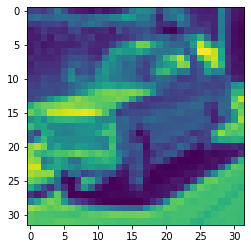

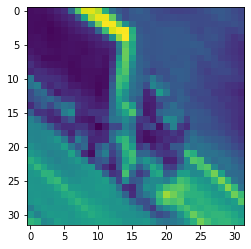

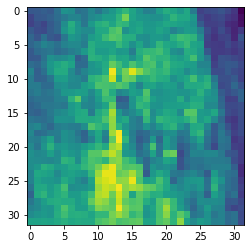

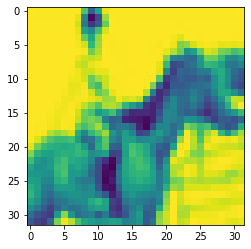

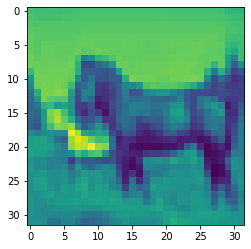

In [5]:
import matplotlib.pyplot as plt

plt.show()
plt.imshow(cifar10_train[32][0][0,:,:])
plt.show()
plt.imshow(cifar10_train[50][0][0,:,:])
plt.show()
plt.imshow(cifar10_train[10][0][0,:,:])
plt.show()
plt.imshow(cifar10_train[131][0][0,:,:])
plt.show()
plt.imshow(cifar10_train[12][0][0,:,:])

detalles del dataset
https://www.cs.toronto.edu/~kriz/cifar.html

## Dataloaders

Construya `dataloaders` para el conjunto de entrenamiento y validación a partir del dataset `cifar10_train`

Construya un `dataloader` para el conjunto de test a partir del dataset `cifar10_test`

Use `shuffling` y tamaño de batch 32 para el conjunto de entrenamiento

In [6]:
from torch.utils.data import Subset, DataLoader
import sklearn.model_selection

In [7]:
# Set de entrenamiento y validación estratíficados
sss = sklearn.model_selection.StratifiedShuffleSplit(train_size=0.75).split(cifar10_train.data, cifar10_train.targets)
train_idx, valid_idx = next(sss)

# Create train data loader
train_dataset = Subset(cifar10_train, train_idx)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=32)

# Create valid data loader
valid_dataset = Subset(cifar10_train, valid_idx)
valid_loader = DataLoader(valid_dataset, shuffle=False, batch_size=256)

# Create test data loader
test_loader = DataLoader(cifar10_test, shuffle=False, batch_size=512)

## Red neuronal convolucional

Construya una clase que herede de `torch.nn.Module` y que implemente una red neuronal convolucional

Tome como base la arquitectura [Lenet5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 
- Tres capas convolucionales cada una seguida de una capa de max-pooling
- Dos capas completamente conectadas
- Función de activación ReLU en todas las capas excepto en la última 
- Función de costo `CrossEntropyLoss`
- Optimizador `Adam`

Entrene su red en la base de datos CIFAR10
- Ajuste los parámetros con el conjunto de entrenamiento
- Evite el sobreajuste y calibre los hyper-parámetros en el conjunto de validación
- Muestre la calidad de su modelo evaluando en el conjunto de prueba

# Global parameters

In [8]:
# number of epochs for train and test
nepochs = 100

# Training NN

In [9]:
import torch

# neural arquitechture
class diego_net_leo(torch.nn.Module):

    # init
    def __init__(self, n_hidden=20, n_filters=8):
        super(diego_net_leo, self).__init__()
        # Extracción de características
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=n_filters, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(in_channels=n_filters, out_channels=16, kernel_size=3)
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3)
        self.mpool = torch.nn.MaxPool2d(kernel_size=3, stride=2)
                
        # Clasificación
        self.fc1 = torch.nn.Linear(in_features=16, out_features=n_hidden)
        self.fc2 = torch.nn.Linear(in_features=n_hidden, out_features=10)
        self.activation = torch.nn.ReLU()
        
    def forward(self, x):
        
        #print("input: ",x.shape)
        #return x
        z = self.activation(self.conv1(x))
        
        #print("conv 1: ", z.shape)
        
        z = self.mpool(z)
        
        #print("pool 1: ", z.shape)
        
        z = self.activation(self.conv2(z))
        
        #print("conv 2: ", z.shape)
        
        z = self.mpool(z)
        
        #print("pool 2: ", z.shape)
        
        z = self.activation(self.conv3(z))
        
        #print("conv 3: ", z.shape)
        
        z = self.mpool(z)
        
        #print("pool 3: ", z.shape)
        
        z = z.reshape(-1, 16*1*1)
        
        #print("reshape: ", z.shape)
        
        z = self.activation(self.fc1(z))
        
        #print("fc1: ", z.shape)
        
        z = self.fc2(z)
        
        #print("fc2: ", z.shape)
        
        return z
    
# model = diego_net_leo()
# display(model.forward(cifar10_train[0][0].unsqueeze(0)))
# display(model)

# Define model, criterion and optimizer

In [10]:
# Define model
# model = diego_net_leo()
model = diego_net_leo().cuda()
# display(model.forward(cifar10_train[0][0].unsqueeze(0)))
# display(model)

In [11]:
# define loss function
criterion = torch.nn.CrossEntropyLoss(reduction='sum')

In [12]:
# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, amsgrad=True)

# Train Neural network

In [13]:
import numpy as np
import time
from tqdm import tqdm_notebook
from torch.utils.tensorboard import SummaryWriter

use_gpu = True
# nepochs = 2
best_valid = np.inf
writer = SummaryWriter(log_dir="/tmp/tensorboard/red_convolucional_simple"+str(time.time()),   flush_secs=20)

# Enviar modelo a la GPU
if use_gpu:
    model = model.cuda()

for k in tqdm_notebook(range(nepochs)):
    
    # Entrenamiento
    epoch_loss, epoch_acc = 0.0, 0.0
    
    for mbdata, mblabel in train_loader:
        
        if use_gpu:
            mbdata, mblabel = mbdata.cuda(), mblabel.cuda()
        # Inferencia
        prediction = model.forward(mbdata)
        # Estimar el error
        loss = criterion(prediction, mblabel)  
        epoch_loss += loss.item()
        epoch_acc += (torch.nn.Softmax(dim=1)(prediction).argmax(dim=1) == mblabel).sum().item()        
        # Calcular gradientes
        optimizer.zero_grad()        
        loss.backward()
        # Actualizar parámetros
        optimizer.step()
        
    # Enviar información a tensorboard
    writer.add_scalar('Train/Loss', epoch_loss/len(train_idx), k)
    writer.add_scalar('Train/Acc', epoch_acc/len(train_idx), k)
    
    # Validación
    epoch_loss, epoch_acc = 0.0, 0.0
    for mbdata, mblabel in valid_loader:
        if use_gpu:
            mbdata, mblabel = mbdata.cuda(), mblabel.cuda()
        # Inferencia
        prediction = model.forward(mbdata)
        # Estimar el error
        loss = criterion(prediction, mblabel)  
        epoch_loss += loss.item()
        epoch_acc += (torch.nn.Softmax(dim=1)(prediction).argmax(dim=1) == mblabel).sum().item()   
        
    # Enviar información a tensorboard
    writer.add_scalar('Valid/Loss', epoch_loss/len(valid_idx), k)
    writer.add_scalar('Valid/Acc', epoch_acc/len(valid_idx), k)
    
    if k % 5 == 0:
        if epoch_loss/len(valid_idx) < best_valid:
            print('new best model')
            best_valid = epoch_loss/len(valid_idx)
            torch.save({'epoca': k,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),                        
                        'loss': epoch_loss/len(valid_idx)}, 
                       '../home/leo/models/best_model.pt') # MODIFICA LA RUTA 

# Retornar modelo a la CPU
if use_gpu:
    model = model.cpu()
    
writer.close()

new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model
new best model



# Retrieve best model 

In [14]:
# recovering best model
model = diego_net_leo()

# load parameters of model
model.load_state_dict(torch.load('../home/leo/models/best_model.pt')['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

# Test on test data

In [15]:
# Testing in test loader
test_targets = cifar10_test.targets
prediction_test = []
for mbdata, label in test_loader:
    logits = model.forward(mbdata)
    prediction_test.append(torch.argmax(logits, dim=1).detach().numpy())

prediction_test = np.concatenate(prediction_test)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_targets, prediction_test)
display(cm)

print(classification_report(test_targets, prediction_test))

array([[562,  43,  70,  15,  14,  10,   8,  13, 228,  37],
       [ 38, 706,  14,   9,   4,   9,   6,  11,  78, 125],
       [ 89,  20, 420,  87, 103,  88,  89,  46,  38,  20],
       [ 15,  16,  93, 332,  71, 259, 102,  47,  42,  23],
       [ 36,  12, 121,  69, 455,  72,  95,  94,  31,  15],
       [  9,   6,  93, 187,  54, 512,  35,  59,  16,  29],
       [ 11,   5,  64, 104,  68,  25, 693,   9,  14,   7],
       [ 29,  11,  51,  51,  98, 103,  15, 570,  21,  51],
       [ 88,  29,  18,  22,   8,   5,   9,   6, 776,  39],
       [ 38, 142,   7,  14,   8,   8,  10,  18, 101, 654]])

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1000
           1       0.71      0.71      0.71      1000
           2       0.44      0.42      0.43      1000
           3       0.37      0.33      0.35      1000
           4       0.52      0.46      0.48      1000
           5       0.47      0.51      0.49      1000
           6       0.65      0.69      0.67      1000
           7       0.65      0.57      0.61      1000
           8       0.58      0.78      0.66      1000
           9       0.65      0.65      0.65      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000



# Analisis de resultados sobre testing


### Add analisis

## Aumentación de datos

Use `torchvision.transforms` para implementar una serie de transformaciones que aumenten el dataset de entrenamiento

Compare los resultados de la red entrenada en datos aumentados con la red entrenada en el conjunto regular

In [16]:
# Define transformations
transform = torchvision.transforms.Compose([
                                            torchvision.transforms.RandomHorizontalFlip(),
                                            torchvision.transforms.RandomRotation(degrees=50),
                                            torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, 
                                                                               saturation=0.5, hue=0.0),
                                            torchvision.transforms.ToTensor()
                                           ])

# Load data with transformation

In [17]:
# Create new train dataset
cifar10_train_augmented = torchvision.datasets.CIFAR10(
    root='../home/leo/datasets', 
    train=True, download=False, 
    transform=transform)

# Create data loader

In [18]:
# Define new loader

# Set de entrenamiento y validación estratíficados
sss = sklearn.model_selection.StratifiedShuffleSplit(train_size=0.75).split(cifar10_train_augmented.data, cifar10_train_augmented.targets)
train_idx, valid_idx = next(sss)

# Create train data loader
train_dataset_augmented = Subset(cifar10_train_augmented, train_idx)
train_loader_augmented = DataLoader(train_dataset_augmented, shuffle=True, batch_size=32)

# Create valid data loader
valid_dataset_augmented = Subset(cifar10_train_augmented, valid_idx)
valid_loader_augmented = DataLoader(valid_dataset_augmented, shuffle=False, batch_size=256)

# Define new model

In [19]:
# Define model 
model_augmented = diego_net_leo().cuda()

optimizer_augmented = torch.optim.Adam(model_augmented.parameters(), lr=1e-3, amsgrad=True)

# define loss function
criterion_augmented = torch.nn.CrossEntropyLoss(reduction='sum')

# Train

In [20]:
# Train model with augmented data
use_gpu = True
# nepochs = 2
best_valid = np.inf
# writer = SummaryWriter(log_dir="/tmp/tensorboard/red_convolucional_simple/"+str(time()),
#                        flush_secs=20)

# Enviar modelo a la GPU
if use_gpu:
    model_augmented = model_augmented.cuda()

for k in tqdm_notebook(range(nepochs)):
    
    # Entrenamiento
    epoch_loss, epoch_acc = 0.0, 0.0
    
    for mbdata, mblabel in train_loader_augmented:
        
        if use_gpu:
            mbdata, mblabel = mbdata.cuda(), mblabel.cuda()
        # Inferencia
        prediction = model_augmented.forward(mbdata)
        # Estimar el error
        loss = criterion_augmented(prediction, mblabel)  
        epoch_loss += loss.item()
        epoch_acc += (torch.nn.Softmax(dim=1)(prediction).argmax(dim=1) == mblabel).sum().item()        
        # Calcular gradientes
        optimizer_augmented.zero_grad()        
        loss.backward()
        # Actualizar parámetros
        optimizer_augmented.step()
    # Enviar información a tensorboard
#     writer.add_scalar('Train/Loss', epoch_loss/len(train_idx), k)
#     writer.add_scalar('Train/Acc', epoch_acc/len(train_idx), k)
    # Validación
    epoch_loss, epoch_acc = 0.0, 0.0
    for mbdata, mblabel in valid_loader_augmented:
        if use_gpu:
            mbdata, mblabel = mbdata.cuda(), mblabel.cuda()
        # Inferencia
        prediction = model_augmented.forward(mbdata)
        # Estimar el error
        loss = criterion_augmented(prediction, mblabel)  
        epoch_loss += loss.item()
        epoch_acc += (torch.nn.Softmax(dim=1)(prediction).argmax(dim=1) == mblabel).sum().item()        
#     # Enviar información a tensorboard
#     writer.add_scalar('Valid/Loss', epoch_loss/len(valid_idx), k)
#     writer.add_scalar('Valid/Acc', epoch_acc/len(valid_idx), k)
    
    if k % 5 == 0:
        if epoch_loss/len(valid_idx) < best_valid:
            best_valid = epoch_loss/len(valid_idx)
            torch.save({'epoca': k,
                        'model_state_dict': model_augmented.state_dict(),
                        'optimizer_state_dict': optimizer_augmented.state_dict(),                        
                        'loss': epoch_loss/len(valid_idx)}, 
                       '../home/leo/models/best_model_augmented.pt') # MODIFICA LA RUTA 

# Retornar modelo a la CPU
if use_gpu:
    model_augmented = model_augmented.cpu()
    
# writer.close()

# Retrieve model

In [21]:
# recovering best model
model_augmented = diego_net_leo()

# loading parameters
model_augmented.load_state_dict(torch.load('../home/leo/models/best_model_augmented.pt')['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

# Test model

In [22]:
# Testing in test loader
test_targets = cifar10_test.targets
prediction_test_augmented = []
for mbdata, label in test_loader:
    logits_ = model_augmented.forward(mbdata)
    prediction_test_augmented.append(torch.argmax(logits_, dim=1).detach().numpy())

    
prediction_test_augmented = np.concatenate(prediction_test_augmented)

# print(prediction_test_augmented)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_targets, prediction_test_augmented)
display(cm)

print(classification_report(test_targets, prediction_test_augmented))

array([[463,  85,  81,  15,  20,  17,  15,  31, 209,  64],
       [ 22, 694,  17,  10,   3,   9,  15,  21,  73, 136],
       [ 91,  29, 309,  59, 204,  85,  92,  77,  33,  21],
       [ 13,  28,  85, 278,  91, 228, 145,  75,  28,  29],
       [ 45,  11,  86,  51, 480,  39, 111, 142,  18,  17],
       [  9,  23,  88, 175,  86, 436,  53,  78,  20,  32],
       [  4,  18,  34,  67, 134,  20, 655,  24,  14,  30],
       [ 19,  24,  45,  40,  82, 100,  19, 615,  18,  38],
       [124,  66,  20,  24,  17,  15,  13,  11, 637,  73],
       [ 36, 289,  14,  14,  12,  12,  31,  35, 122, 435]])

              precision    recall  f1-score   support

           0       0.56      0.46      0.51      1000
           1       0.55      0.69      0.61      1000
           2       0.40      0.31      0.35      1000
           3       0.38      0.28      0.32      1000
           4       0.43      0.48      0.45      1000
           5       0.45      0.44      0.44      1000
           6       0.57      0.66      0.61      1000
           7       0.55      0.61      0.58      1000
           8       0.54      0.64      0.59      1000
           9       0.50      0.43      0.46      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000



# Comparación entrenamiento con y sin aumentación

### Agregar analisis
- Compare augmentation scores (accuracy) with not augmentation scores (accuracy)

El resumen de resultados f-score obtenido de los datos son los siguientes:

Épocas usadas = 100

· Modelo sin aumentación: 0.57

· Modelo con aumentación: 0.5


# Analisis Final

- Agregar comentarios de arquitectura (buena o mala para esta tarea de clasificacion) basados en los scores obtenidos

- Analisar augmented data y su aporte en esta tarea de clasificacion

- ETC

** Modelo de Capas: **
 
 · 3 Capas convolucionales con activaciones c/u
 
 · 3 Capas MaxPooling
 
 · 2 Capas completamente conectadas con 1 de activación y otra solo de salida
 
** Función de Activación **

 ·Función ReLU(x) = max(0,x)
 
** Función de pérdida **

 ·CrossEntropyLoss clasificación multivariable

** Función de Optimizador **
 
 ·Adam

Con la arquitectura implementada es probable que no sea efectiva, debido que en la LeNet-5 usa una función de activación distinta además de otra función de pérdida, ya que se necesitó de muchas épocas para aumentar el valor del aprendisaje llegando a 0.59 con 1000 épocas

Basados en los resultados del score, podemos asumir que para las características ejecutadas, el modelo no ajusta correctamente los datos, ya que con aumentación de datos, produce un sobreajuste de un -0.07%, lo que nos puede decir los resultados de la aumentación de datos es que puede que se necesiten mas capas neuronas para el proceso de entrenamiento

## Propuestos (bonus)

- Implemente una arquitectura de tipo [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networ)
- Pruebe la eficacia de Dropout o Regularización L2 en los pesos